In [5]:
import os
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import load_model
from sklearn.preprocessing import MinMaxScaler
import math
import tensorflow as tf
sc = MinMaxScaler(feature_range=(0,1)) #normalisasi dari 0 - 1

In [6]:
path_dir = "data_plus_mei"
list_file = os.listdir(path_dir)
list_file

asii_data = path_dir+"/"+list_file[2]
amrt_data = path_dir+"/"+list_file[1]
untr_data = path_dir+"/"+list_file[8]
unvr_data = path_dir+"/"+list_file[9]
mapi_data = path_dir+"/"+list_file[6]
inkp_data = path_dir+"/"+list_file[4]
intp_data = path_dir+"/"+list_file[5]
aces_data = path_dir+"/"+list_file[0]
sido_data = path_dir+"/"+list_file[7]
hrum_data = path_dir+"/"+list_file[3]

In [13]:
def data_clean(path_data):
  df = pd.read_csv(path_data)
  df = df.drop('Unnamed: 0', axis=1)
  df = df.sort_values('date', ascending=True)
  df.set_index('date', inplace=True)
  return df

In [49]:
def view_result_bef_af(pred_res, df_before):
  
  # organize the results in a data frame
  df_past = df_before[['close']].reset_index()
  df_past.rename(columns={'index': 'date', 'close': 'actual'}, inplace=True)
  df_past['date'] = pd.to_datetime(df_past['date'])
  df_past['forecast'] = np.nan
  #print(pred_res)
  df_past['forecast'].iloc[-1] = df_past['actual'].iloc[-1]
  df_future = pd.DataFrame(columns=['date', 'actual', 'forecast'])
  df_future['date'] = pd.date_range(start=df_past['date'].iloc[-1] + pd.Timedelta(days=1), periods=len(pred_res))
  df_future['forecast'] = pred_res
  df_future['actual'] = np.nan
  # print(df_past.head())
  # print(df_past.tail())
  # print(df_future.head())
  # print(df_future.tail())
  results = df_past._append(df_future).set_index('date')
  # plot the results
  results.plot()

In [8]:
model_list = os.listdir('model_final')

In [9]:
model_list

['aces_5_100_0_100_8_30.h5',
 'amrt_1_300_0_100_8_7.h5',
 'asii_1_100_0.2_100_8_30.h5',
 'hrum_1_100_0_100_8_7.h5',
 'inkp_1_100_0_200_32_7.h5',
 'intp_1_100_0.2_100_32_30.h5',
 'mapi_1_100_0_200_8_30.h5',
 'sido_1_300_0_100_8_7.h5',
 'untr_1_100_0.2_100_8_30.h5',
 'unvr_1_100_0.2_100_8_30.h5']

In [32]:
curr_model = "model_final/"+model_list[7]
timestep = load_model(curr_model).get_config()['layers'][0]['config']['batch_input_shape'][1]
print(timestep)

7


In [33]:
data_test = data_clean(sido_data)
len(data_test[485:])

93

In [34]:
def predict(df,  model, num_predict):
  test_len = len(df[485:])
  curr_model = load_model(model_list[0])
  timesteps = curr_model.get_config()['layers'][0]['config']['batch_input_shape'][1]
  #inputnya dimulai dari total data dikurang data test dikurang timestep (jadi dikurang 30 hari sebelum data terbaru dari data train)
  inputs= df[len(df)-test_len-num_predict-timestep:].values
  inputs = inputs.reshape(-1,1)
  inputs = sc.fit_transform(inputs)
  
  x_test = [] #loop dari 30 dengan ukuran data yang 485 - 30 = 455 itu
  for i in range(timesteps, inputs.shape[0]):
    x_test.append(inputs[i-timesteps:i, 0])
  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
  predict = model.predict(x_test)
  predict = sc.inverse_transform(predict)
  #print(predict)
  return predict[test_len:]

In [45]:
def predict2(df,  model, num_predict):
  #test_len = len(df[485:])
  curr_model = load_model(model)
  timesteps = curr_model.get_config()['layers'][0]['config']['batch_input_shape'][1]
  #inputnya dimulai dari total data dikurang data test dikurang timestep (jadi dikurang 30 hari sebelum data terbaru dari data train)
  inputs= df[len(df)-num_predict-timestep:].values
  inputs = inputs.reshape(-1,1)
  inputs = sc.fit_transform(inputs)
  
  x_test = [] #loop dari 30 dengan ukuran data yang 485 - 30 = 455 itu
  for i in range(timesteps, inputs.shape[0]):
    x_test.append(inputs[i-timesteps:i, 0])
  x_test = np.array(x_test)
  x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))
  predict = curr_model.predict(x_test)
  predict = sc.inverse_transform(predict)
  #print(predict)
  return predict

In [38]:
def get_last(data_test, curr_model, num):
    res = predict(data_test['close'], curr_model,num)
    return res[-1][0]
def get_last2(data_test, curr_model, num):
    res = predict2(data_test['close'], curr_model,num)
    return res[-1][0]
def see_result(data_test, curr_model, num):
    res = predict(data_test['close'], curr_model,num)
    view_result_bef_af(res, data_test)
def see_result2(data_test, curr_model, num):
    res = predict2(data_test['close'], curr_model,num)
    view_result_bef_af(res, data_test)



In [52]:
print(predict2(data_test['close'], curr_model, 30)[-1][0])


1/1 [==============================] - 1s 1s/step
700.1081


1/1 [==============================] - 1s 1s/step


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_4732\3277571471.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_past['forecast'].iloc[-1] = df_past['actual'].iloc[-1]
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_4732\3277571471.py:9:

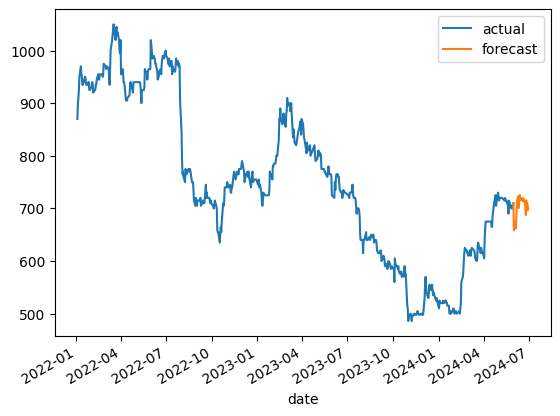

In [53]:

see_result2(data_test, curr_model, 30)

In [58]:
print(predict2(data_test['close'], curr_model, 30)[-1][0])

1/1 [==============================] - 1s 1s/step
700.1081


1/1 [==============================] - 1s 1s/step


C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_4732\3277571471.py:9: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_past['forecast'].iloc[-1] = df_past['actual'].iloc[-1]
C:\Users\ThinkPad\AppData\Local\Temp\ipykernel_4732\3277571471.py:9:

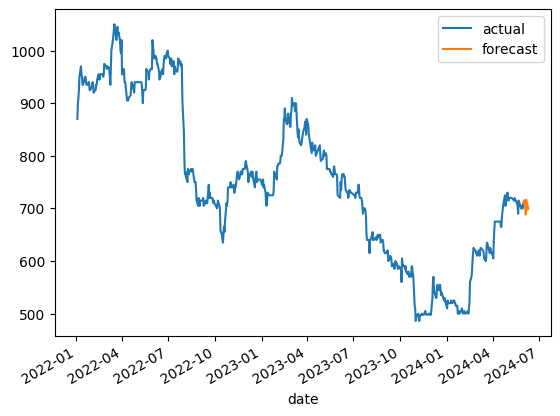

In [57]:

see_result2(data_test, curr_model, 10)

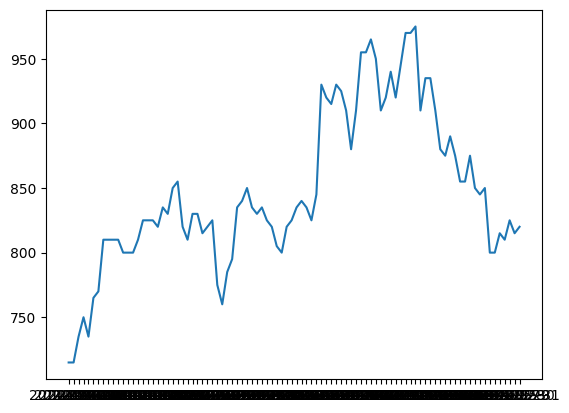

In [201]:
plt.plot(data_test['close'])

1/1 [==============================] - 0s 34ms/step


array([[878.59406],
       [846.59314],
       [842.8882 ],
       [851.1985 ],
       [801.15375],
       [800.9359 ],
       [820.30707],
       [811.99805],
       [825.05023],
       [815.23645]], dtype=float32)